# DTRB 데이터셋 형식으로 변환

In [52]:
!git clone https://github.com/DaveLogs/TRDG2DTRB.git

Cloning into 'TRDG2DTRB'...


TRDG2DTRB 의 convert.py 파일을 실행시켜 데이터셋을 변환할 건데, convert.py 파일은 데이터가

새우다_00001.png, 안녕_00002.png 처럼 되어있는 것을 가정하므로 파일명을 label_index.png 형식으로 변환

In [11]:
from tqdm import tqdm

for i in tqdm(range(train.shape[0])):
    os.rename(train['img_path'][i], './train/' + train['label'][i] + train['img_path'][i][-10:])

100%|██████████████████████████████████████████████████████████████████████████| 76888/76888 [00:04<00:00, 15657.60it/s]


In [13]:
os.listdir('./train')

['머_00001.png',
 '차차_00002.png',
 '써_00003.png',
 '놓치다_00004.png',
 '유월_00006.png',
 '빈_00007.png',
 '손뼉_00008.png',
 '숫자_00009.png',
 '윷_00010.png',
 '동아리_00011.png',
 '썰다_00012.png',
 '인정되다_00013.png',
 '슬쩍_00014.png',
 '신설_00015.png',
 '과자_00016.png',
 '입맛_00017.png',
 '휴지통_00018.png',
 '나오다_00019.png',
 '선언하다_00020.png',
 '온통_00021.png',
 '앞뒤_00022.png',
 '멈추다_00023.png',
 '비롯하다_00024.png',
 '셋째_00025.png',
 '이빨_00026.png',
 '훵_00027.png',
 '치약_00028.png',
 '가하다_00029.png',
 '부서_00030.png',
 '시인_00031.png',
 '걱정스럽다_00032.png',
 '저_00033.png',
 '거꾸로_00034.png',
 '신비_00035.png',
 '절_00037.png',
 '수_00038.png',
 '괼_00039.png',
 '생일_00040.png',
 '교통_00041.png',
 '꾸리다_00042.png',
 '뀌_00043.png',
 '긴장_00044.png',
 '근무_00045.png',
 '본격적_00046.png',
 '개국_00047.png',
 '작아지다_00048.png',
 '한두_00049.png',
 '네_00050.png',
 '듬_00051.png',
 '괵_00052.png',
 '체계적_00053.png',
 '거대하다_00054.png',
 '속도_00055.png',
 '벌_00056.png',
 '나다_00057.png',
 '대강_00058.png',
 '놓아두다_00059.png',
 '령_00060.png',
 '흔_

In [18]:
!python3 TRDG2DTRB/convert.py \
     --input_path ./data/train \
     --output_path ./data_transformed/train

input path:  /home/cuai5th/CUAI_2022/KWAKsumin/OCR/data/train
output path:  /home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train

Output folder already exists.

So, delete all data of output folder [/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train]

Total file count:  76888
76800 / 76888 Processing !!
Conversion complete!



In [19]:
!python3 deep/TRDG2DTRB/convert.py \
     --input_path ./data/test \
     --output_path ./data_transformed/test

input path:  /home/cuai5th/CUAI_2022/KWAKsumin/OCR/data/test
output path:  /home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/test

Output folder already exists.

So, delete all data of output folder [/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/test]

Total file count:  74121
74100 / 74121 Processing !!
Conversion complete!



## Train/Valid Split

In [51]:
train = pd.read_csv('./data_transformed/train/gt.txt', sep='\t', header=None)
train.columns = ['img_path', 'label']

In [52]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(train, test_size=0.2)

In [53]:
valid

,img_path,label
39364,images/image_39364.png,초청장
23199,images/image_23199.png,볐
76635,images/image_76635.png,존중하다
16639,images/image_16639.png,장가
42843,images/image_42843.png,사전
...,...,...
16376,images/image_16376.png,핏
2112,images/image_02112.png,딸
70544,images/image_70544.png,코드
36683,images/image_36683.png,뗑


train 폴더에서 valid 셋으로 떨어진 데이터를 valid 폴더로 이동

In [59]:
for i in tqdm(range(valid.shape[0])):
    os.rename('./data_transformed/train/' + valid['img_path'].iloc[i], './data_transformed/valid/' + valid['img_path'].iloc[i])

100%|██████████████████████████████████████████████████████████████████████████| 15378/15378 [00:00<00:00, 21748.90it/s]


In [69]:
train.to_csv('./data_transformed/train/gt.txt', sep='\t', index=False, header=False)
valid.to_csv('./data_transformed/valid/gt.txt', sep='\t', index=False, header=False)

----

## Cut-Mix

In [ ]:
import shutil

shutil.copytree('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train', '/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import random
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug/gt.txt', header=None, sep='\t')
df.columns = ['img_path', 'label']
df['len'] = df['label'].str.len()
df

,img_path,label,len
0,images/image_004518.png,약,1
1,images/image_009398.png,업무,2
2,images/image_013852.png,떪,1
3,images/image_011511.png,삼,1
4,images/image_048669.png,이력서,3
...,...,...,...
58323,images/image_069986.png,삣,1
58324,images/image_006082.png,낳,1
58325,images/image_070643.png,성,1
58326,images/image_021522.png,발,1


In [41]:
# 기본 디렉토리 위치를 aug 데이터 폴더로 변경

os.chdir('/home/cuai5th/CUAI_2022/KWAKsumin/OCR/data_transformed/train_aug')

In [42]:
len(os.listdir('./images'))

58328

In [14]:
df['img_path'][0], 'images/image_0' + df['img_path'][0][-9:-4] + '.png'

('images/image_27160.png', 'images/image_027160.png')

In [36]:
# 원본파일은 숫자가 5자리였음 -> 6자리로 바꾸기(데이터가 10만단위까지 더 늘어나야 하기 때문)

from tqdm import tqdm

for i in tqdm(range(df.shape[0])):
    os.rename(df['img_path'][i], 'images/image_0' + df['img_path'][i][-9:-4] + '.png')
    df['img_path'][i] = 'images/image_0' + df['img_path'][i][-9:-4] + '.png'

100%|████████████████████████████████████████████████████████████████████████████| 61510/61510 [04:53<00:00, 209.85it/s]


In [45]:
df

,img_path,label,len
0,images/image_004518.png,약,1
1,images/image_009398.png,업무,2
2,images/image_013852.png,떪,1
3,images/image_011511.png,삼,1
4,images/image_048669.png,이력서,3
...,...,...,...
58323,images/image_069986.png,삣,1
58324,images/image_006082.png,낳,1
58325,images/image_070643.png,성,1
58326,images/image_021522.png,발,1


In [46]:
df_len_count = pd.DataFrame(df['len'].value_counts())
df_len_count.reset_index(inplace=True)
df_len_count.columns = ['len', 'len_count']

display(df_len_count)

,len,len_count
0,1,23703
1,2,18655
2,3,8762
3,4,6521
4,5,671
5,6,16


In [47]:
len2count = {k:v for k,v in zip(df_len_count['len'], df_len_count['len_count'])}
len2count

{1: 23703, 2: 18655, 3: 8762, 4: 6521, 5: 671, 6: 16}

Text(0.5, 1.0, '창작살')

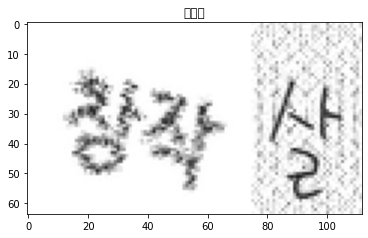

In [57]:
select1, select2 = random.choice(df['img_path']), random.choice(df['img_path'])
label1, label2 = df[df['img_path'] == select1]['label'].item(), df[df['img_path'] == select2]['label'].item()
    

# 이미지 읽기
img1 = cv2.imread(select1, 1);
img2 = cv2.imread(select2, 1);
    
addh = cv2.hconcat([img1, img2])
plt.imshow(addh)
plt.title(label1 + label2)

위 plot 그림처럼 Cutmix로 새로운 이미지를 생성해서 파일에 저장하고, 데이터프레임에 추가

In [58]:
idx = 100000
img_original = df['img_path']

for i in tqdm(range(50000)):
    select1, select2 = random.choice(img_original), random.choice(img_original)
    len1, len2 = df[df['img_path'] == select1]['len'].item(), df[df['img_path'] == select2]['len'].item()
    label1, label2 = df[df['img_path'] == select1]['label'].item(), df[df['img_path'] == select2]['label'].item()
    
    if len1 + len2 > 6:
        continue
        
    if len2count[len1 + len2] > 30000:
        continue
    
    # 이미지 읽기
    img1 = cv2.imread(select1, 1);
    img2 = cv2.imread(select2, 1);
    
    addh = cv2.hconcat([img1, img2])
    
    new_data = {
        'img_path' : f"images/image_{idx:06d}.png",
        'label' : label1 + label2,
        'len' : len1 + len2
    }
    
    df = df.append(new_data, ignore_index=True)
    cv2.imwrite(f"images/image_{idx:06d}.png", addh)
    idx += 1
    len2count[len1 + len2] += 1
    

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [1:11:22<00:00, 23.35it/s]


In [61]:
df = df.drop(['len'], axis=1)

In [63]:
df.to_csv('./gt.txt', sep='\t', encoding='utf-8-sig', index=False, header=None)